<div class="alert alert-danger">

# PSY 3019/6973-G-H23
# Cueillette et traitement des données en neurosciences cognitives
## Travail 1:
<li>Manipulation de données.
<li>la chaîne, l’entier, la flottante, la liste, le tuple, le dictionnaire
<li>pandas.DataFrame
<li>numpy
<li>indexation
<li>combinaison de données. Pandas "groupby"

<div class="alert alert-info">
<ul><b>ATTENTION</b>
    <li>il est important que le code fonctionne
    <li>il est important que la tâche demandée soit prèsente
    <li>la structure et la beauté du code est importantes</div>

In [31]:
import pandas as pd
import numpy
import csv

Nom: METAYER -- MARIOTTI Pierrebriac

<div class="alert alert-danger">
<ol start=1><li>pandas.DataFrame (poids = 0.5)
    <ul>
    <li>création dataframe
</ul></ol></div>

In [32]:
# créer un pandas DataFrame

data_vide = pd.DataFrame()

In [33]:
# Importer mon data frame

# Charger le fichier CSV existant
data = pd.read_csv("PierreBriacMétayerMariotti_données_psy3019-H23_20220211_distribution-human-rights-vdem.csv")
data

,Entity,Code,Year,civ_libs_vdem_owid,region
0,Afghanistan,AFG,1789,0.122,Asia
1,Afghanistan,AFG,1790,0.122,Asia
2,Afghanistan,AFG,1791,0.122,Asia
3,Afghanistan,AFG,1792,0.122,Asia
4,Afghanistan,AFG,1793,0.122,Asia
...,...,...,...,...,...
33621,Zimbabwe,ZWE,2017,0.434,Africa
33622,Zimbabwe,ZWE,2018,0.428,Africa
33623,Zimbabwe,ZWE,2019,0.391,Africa
33624,Zimbabwe,ZWE,2020,0.399,Africa


<div class="alert alert-danger">
<ol start=2><li>pseudocode (poids = 1)
<ul><li>pseudocode
</ul></ol></div>

<div class="alert alert-info">
<ul><b>Travail 1:</b>
    

<li>dataframe créé (0.5 %)
<li>pseudocode définie (1%)
<li>indexation utilisée (2 %)
<li>combinaison des données (2 %)
<li>Numpy code implémenté (2%)
<li>« groupby » est utilisé (2.5 %)
<li>remise en fichier .ipynb sur GitHub, le plus tard à 23h59 du jour prévu.
<li>Chaque jour après le temps alloué coûte 0.25%.


On va dans un premier temps importer notre data frame puis l'enregistrer dans un data frame du nom de data.

Ensuite on va travailler sur l'indexation. On va montrer plusieurs techniques d'indexation (comme utilisation de .index, .loc[], etc...). On s'en servira par la suite.

Ensuite on va créer deux tableaux, qui vont représenter des ventes fictices d'un produit au cours des mois. On va ensuite les rassembler (combinaison de données).

On va ensuite transformer ce tableau en format numpy et faire quelques calculs dessus. 

Pour finir on va réunir les données d'un tableau autour des ventes (on va créer un tableau avec les ventes d'un produit chaque mois). Pour faire cette étape on va utiliser 'groupby'

Enfin on va montré à quoi cela a servit de rassembler les données en faisant un graphique des ventes en fonction des mois et de chaque produit.

On va aussi pour finir réutiliser la banque de données data et utiliser groupby pour rassembler les données autour des continents. On va ensuite afficher sur un graphique l'évolution des libertés civiles de 1850 à nos jours en fonction des continents.

<div class="alert alert-danger">
<ol start=3><li>indexation (poids = 2)
    <ul><li>utilisation d'indexation
</ul></ol></div>

In [34]:
# Donner le nombre d'index
data.index

RangeIndex(start=0, stop=33626, step=1)

In [35]:
#Donne le noms des colonnes
data.columns

Index(['Entity', 'Code', 'Year', 'civ_libs_vdem_owid', 'region'], dtype='object')

In [36]:
# La troisième valeur de la colonne "Year" (index 2)
Val1 = data.loc[2, 'Year']
Val1

1791

In [37]:
#Donne du troisième au cinquième index
Val2 = data.loc[3:5]
Val2

,Entity,Code,Year,civ_libs_vdem_owid,region
3,Afghanistan,AFG,1792,0.122,Asia
4,Afghanistan,AFG,1793,0.122,Asia
5,Afghanistan,AFG,1794,0.122,Asia


In [38]:
# Donne du troisième au cinquième index de la colonne "Year" 
Val3 = data.loc[3:5, 'Year']
Val3

3    1792
4    1793
5    1794
Name: Year, dtype: int64

In [39]:
# Autre technique faisant la même chose qu'au dessus
data["Year"][3:6]

3    1792
4    1793
5    1794
Name: Year, dtype: int64

In [40]:
# Affiche les 10 premières lignes

data.head(10)

,Entity,Code,Year,civ_libs_vdem_owid,region
0,Afghanistan,AFG,1789,0.122,Asia
1,Afghanistan,AFG,1790,0.122,Asia
2,Afghanistan,AFG,1791,0.122,Asia
3,Afghanistan,AFG,1792,0.122,Asia
4,Afghanistan,AFG,1793,0.122,Asia
5,Afghanistan,AFG,1794,0.122,Asia
6,Afghanistan,AFG,1795,0.122,Asia
7,Afghanistan,AFG,1796,0.122,Asia
8,Afghanistan,AFG,1797,0.122,Asia
9,Afghanistan,AFG,1798,0.122,Asia


In [41]:
# Affiche les 10 premières lignes de la colonne "Entity"
data.Entity.head(10)

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
5    Afghanistan
6    Afghanistan
7    Afghanistan
8    Afghanistan
9    Afghanistan
Name: Entity, dtype: object

<div class="alert alert-danger">
<ol start=4><li>combinaison (poids = 2)
    <ul><li>combinaison des données
</ul></ol></div>

In [43]:
# On construit des data frames imaginaires
Vente_1 = pd.DataFrame({'produit': ['A', 'A', 'B', 'B', 'C', 'C'],
        'mois': ['janvier', 'février', 'janvier', 'février', 'janvier', 'février'],
        'ventes': [120, 50, 250, 500, 15, 105]})

Vente_2 = pd.DataFrame({'produit': ['A', 'A', 'B', 'B', 'C', 'C'],
        'mois': ['mars', 'avril', 'mars', 'avril', 'mars', 'avril'],
        'ventes': [130, 150, 175, 200, 75, 125]})

In [44]:
#On combine les deux data frame
Vente_totale = Vente_1.append(Vente_2)
Vente_totale

/var/folders/1t/m_ny6jj121304b52s3qrp6dm0000gn/T/ipykernel_47350/3875431999.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vente_totale = Vente_1.append(Vente_2)


,produit,mois,ventes
0,A,janvier,120
1,A,février,50
2,B,janvier,250
3,B,février,500
4,C,janvier,15
5,C,février,105
0,A,mars,130
1,A,avril,150
2,B,mars,175
3,B,avril,200


In [45]:
# Une autre technique

Vente_totale2 = pd.concat([Vente_1, Vente_2], axis=0) # les DataFrames seront concaténés en ligne avec axis = 0
Vente_totale2

,produit,mois,ventes
0,A,janvier,120
1,A,février,50
2,B,janvier,250
3,B,février,500
4,C,janvier,15
5,C,février,105
0,A,mars,130
1,A,avril,150
2,B,mars,175
3,B,avril,200


<div class="alert alert-danger">
<ol start=5>
    <li>numpy (poids = 2)
    <ul>
    <li> implementation du code Numpy
</ul></ol></div>

In [46]:
# Transformation du tableau Vente_totale en tableau numpy

import numpy as np

Vente_totale_np = Vente_totale.values

print(type(Vente_totale_np))


<class 'numpy.ndarray'>


In [47]:
Vente_totale_np

array([['A', 'janvier', 120],
       ['A', 'février', 50],
       ['B', 'janvier', 250],
       ['B', 'février', 500],
       ['C', 'janvier', 15],
       ['C', 'février', 105],
       ['A', 'mars', 130],
       ['A', 'avril', 150],
       ['B', 'mars', 175],
       ['B', 'avril', 200],
       ['C', 'mars', 75],
       ['C', 'avril', 125]], dtype=object)

In [48]:
# Calcul de la somme des ventes
total_ventes = np.sum(Vente_totale_np[:, 2])
total_ventes

1895

In [49]:
# Moyenne de toutes les valeurs
moyennes_ventes = np.mean(Vente_totale_np[:, 2])
moyennes_ventes

157.91666666666666

In [50]:
# Calculer le minimum et le maximum de toutes les valeurs
min_ventes = np.min(Vente_totale_np[:, 2])
max_ventes = np.max(Vente_totale_np[:, 2])
print(min_ventes)
print(max_ventes)

15
500


In [51]:
# Trier les valeurs dans l'ordre croissant ou décroissant

ventes_sorted_ascending = np.sort(Vente_totale_np[:, 2])
ventes_sorted_descending = np.sort(Vente_totale_np[:, 2])[::-1]
print(ventes_sorted_ascending)
print(ventes_sorted_descending)

[15 50 75 105 120 125 130 150 175 200 250 500]
[500 250 200 175 150 130 125 120 105 75 50 15]


In [52]:
# Produit matriciel entre la colonne des ventes du tableau Vente_totale_np et sa transposée

matrix_product = np.dot(Vente_totale_np[:, 2], Vente_totale_np[:, 2].T)
matrix_product

471925

<div class="alert alert-danger">
<ol start=6><li>groupby (poids = 2.5)
        <ul><li> utilisation du « pandas.DataFrame.groupby</ul></ol></div>

In [54]:
Vente_totale

,produit,mois,ventes
0,A,janvier,120
1,A,février,50
2,B,janvier,250
3,B,février,500
4,C,janvier,15
5,C,février,105
0,A,mars,130
1,A,avril,150
2,B,mars,175
3,B,avril,200


In [55]:
# Regroupement des données par produit
grouped = Vente_totale.groupby('produit')
# Affichage des ventes totales pour chaque produit
print(grouped['ventes'].sum())

produit
A     450
B    1125
C     320
Name: ventes, dtype: int64


In [56]:
# Regroupement des données par mois
grouped1 = Vente_totale.groupby('mois')

# Affichage des ventes totales pour chaque mois
print(grouped1['ventes'].sum())

mois
avril      475
février    655
janvier    385
mars       380
Name: ventes, dtype: int64


<div class="alert alert-danger">
Graphique des ventes bonus


In [57]:
# Regroupe les données
grouped_graph = Vente_totale.groupby(["produit","mois"]).sum().reset_index()

In [58]:
# Mettre les mois en colonnes
grouped_graph = grouped_graph.pivot(index='produit', columns='mois', values='ventes')

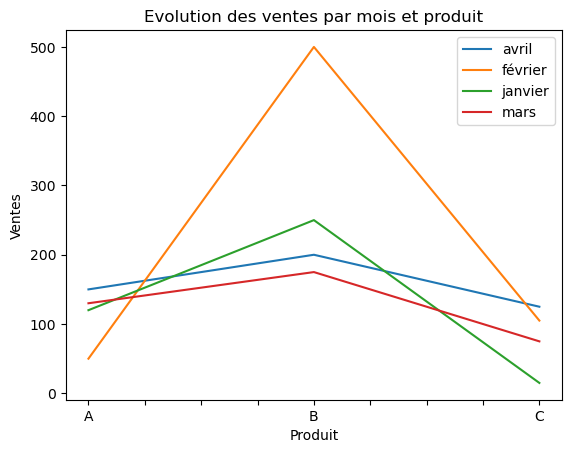

In [59]:
# Afficher le graphique des ventes
import matplotlib.pyplot as plt
grouped_graph.plot(kind='line')
plt.title("Evolution des ventes par mois et produit")
plt.xlabel("Produit")
plt.ylabel("Ventes")
plt.legend(loc='best')
plt.show()


In [60]:
df_grouped = data.groupby(['region', 'Year'], as_index=False).mean()

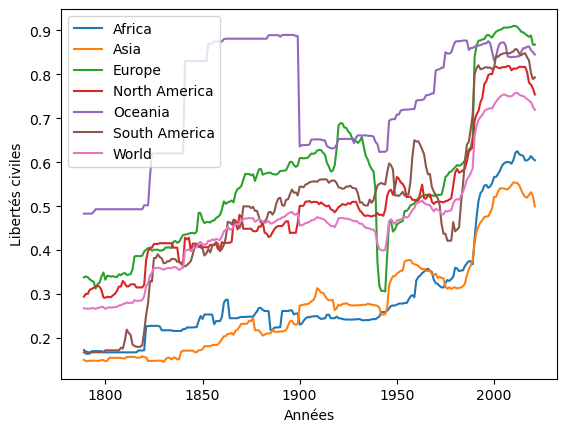

In [70]:
# graphique du niveau de liberté dans chaque continent entre 1789 et 2021

for region, group in df_grouped.groupby('region'):
    plt.plot(group['Year'], group['civ_libs_vdem_owid'], label=region)

plt.legend()
plt.xlabel('Années')
plt.ylabel('Libertés civiles')
plt.show()
